# Overview

## Objective
Our goal is to visualize relationships between variables to uncover unhealthy habits that lead to strokes. In addition, we seek to build models that are able to predict the probability a stroke will occur given a variety of health factors. We are using a Stroke dataset that we obtain from [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Import Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

## Load the Stroke dataset

In [75]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep = ',')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Looking at the dataset above we can see that we various types of variables. Hypertension, heart_disease, and stroke are coded as binary variables. The gender, ever_married, work_type, Residence_type, and smoking_status are categorical variables that we may need to code as binary variables in order to perform exploratory data analysis and build predictive models. The age, avg_glucose_level, and bmi are continuous numerical variables.

## Checking Data info and Checking for missing values

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [77]:
data.isnull().sum().sort_values(ascending = False)

bmi                  201
stroke                 0
smoking_status         0
avg_glucose_level      0
Residence_type         0
work_type              0
ever_married           0
heart_disease          0
hypertension           0
age                    0
gender                 0
id                     0
dtype: int64

In [78]:
data['bmi'].isnull().sum()/len(data)*100

3.9334637964774952

Looking at the data's info above, we see that there are 201 missing values for the bmi variable. In other words the vmi variable is missing about 3.93% of values. In. order to use the variable in our models we are going to need to find a way to account for the missing values. We could either use the mean or median as a placeholder for the missing values.

## Summary Statistics

### Numerical Variables

In [79]:
round(data.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


Looking at the summary statistics we notice a few interesting things. First, we once again see the 201 missing values for bmi. Another thing we notice for bmi is the max value. We seet the max value for bmi is 97.6. However, a bmi over 30 is considered overweight and a bmi over 40 is considered class III extreme Obesity. Another strange finding comes from the age variable. Looking at the minimum value for age we see 0.08. This does not make sense and we will have to look at this closer.

### Categorical Variables

In [80]:
round(data.describe(exclude = ['float','int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Looking at the summary statistics for categorical variables, we do not see anything unsual or worrying. We do notice that the majority of individuals are female. We also notice a majority are married, work private sector job, and live in an urban area. We also notice the largest category for smoking_status is never smoked, but it seems that variable will be more evenly distrubted among the 4 different possible options.

In the above section, we filled all the missing values in the bmi column with the median of all values for bmi. We decided to use median, but the mean is not far off (28.1 vs 28.89).

# Data Visualization

## Checking the Proportion of people who have either suffered or not suffered a stroke in the dataset

In [81]:
print("Percentage of People who have Suffered a Stroke")
print(round((data['stroke'].sum()/5110)*100, 2),'%')

print('Percentage of People who have NOT Suffered a Stroke')
print(100-round((data['stroke'].sum()/5110)*100, 2),'%')

Percentage of People who have Suffered a Stroke
4.87 %
Percentage of People who have NOT Suffered a Stroke
95.13 %


## Graphing the proportion of strokes present in the dataset

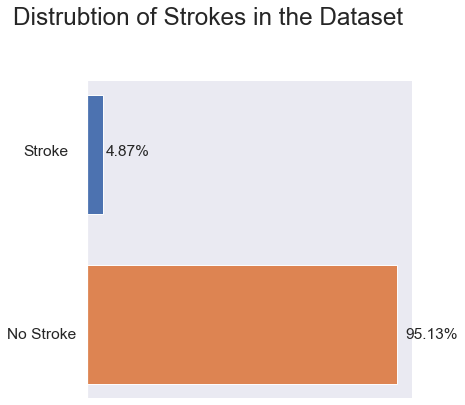

In [82]:
x = pd.DataFrame(data.groupby(['stroke'])['stroke'].count())

fig, ax = plt.subplots(figsize = (6,6), dpi = 70)

# Adding a Title
plt.text(-1150, 1.77, 'Distrubtion of Strokes in the Dataset', {'size':25})

# Create the bar for healthy people who have not suffered a stroke 
ax.barh([1], x.stroke[1], height = 0.7)
plt.text(-1250,-0.08, 'No Stroke',{'size':16})

# Create a label that shows the percentage of people who have not suffered a stroke
plt.text(5000,-0.08, '95.13%',{'size':16})

# Create the bar for people who have suffered a stroke
ax.barh([0], x.stroke[0], height = 0.7)
plt.text(-1000,1, 'Stroke',{'size':16})

# Create a label that shows the percentage of people who have suffered a stroke
plt.text(300,1, '4.87%', {'size':16})

# Get rid of the x and y axis
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Get rid of the borders
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

As you can see from the chart, the dataset is highly unbalanced. The majority of people in the dataset have not suffered a stroke. In order to build a proper model, we have to balance our dataset, since the instance we are trying to predict occurs so rarely in our dataset. 

## Visualization for Gender

In [83]:
male = data[data['gender'] == 'Male'].groupby(['stroke'])['gender'].count().reset_index()

female = data[data['gender'] == 'Female'].groupby(['stroke'])['gender'].count().reset_index()

other = data[data['gender'] == 'Other'].groupby(['stroke'])['gender'].count().reset_index()

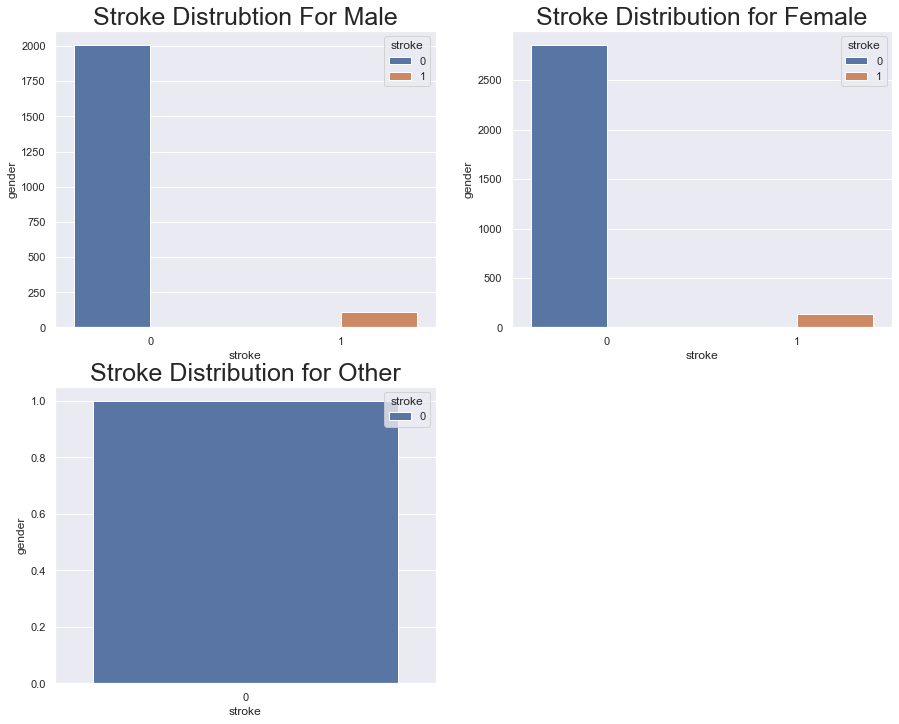

In [84]:
plt.figure(figsize = (15, 12))

plt.subplot(2, 2, 1)
sns.barplot(x = 'stroke', y = 'gender', hue = 'stroke', data = male).set_title('Stroke Distrubtion For Male').set_fontsize(25)

plt.subplot(2, 2, 2)
sns.barplot(x = 'stroke', y = 'gender', hue = 'stroke', data = female).set_title('Stroke Distribution for Female').set_fontsize(25)

plt.subplot(2, 2, 3)
sns.barplot(x = 'stroke', y = 'gender', hue = 'stroke', data = other).set_title('Stroke Distribution for Other').set_fontsize(25)

plt.show()

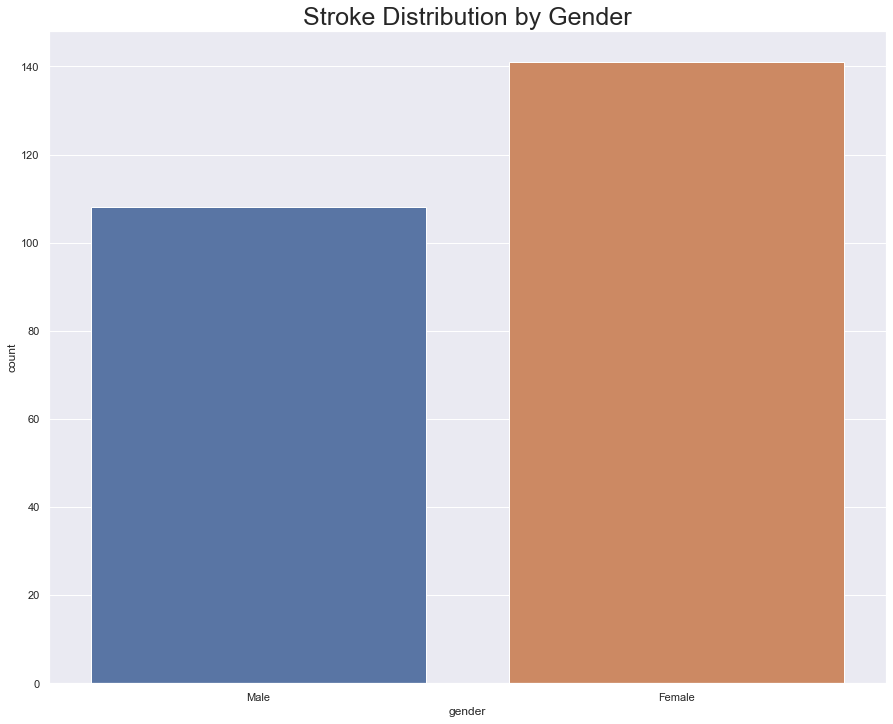

In [85]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
sns.countplot(data = stroke, x = 'gender').set_title('Stroke Distribution by Gender').set_fontsize(25)

plt.show()

Looking at the chart above we see that women are more likely to suffer a stroke compared to men.

## Visualization for Marital Status

In [86]:
married = data[data['ever_married'] == 'Yes'].groupby(['stroke'])['ever_married'].count().reset_index()

unmarried = data[data['ever_married'] == 'No'].groupby(['stroke'])['ever_married'].count().reset_index()

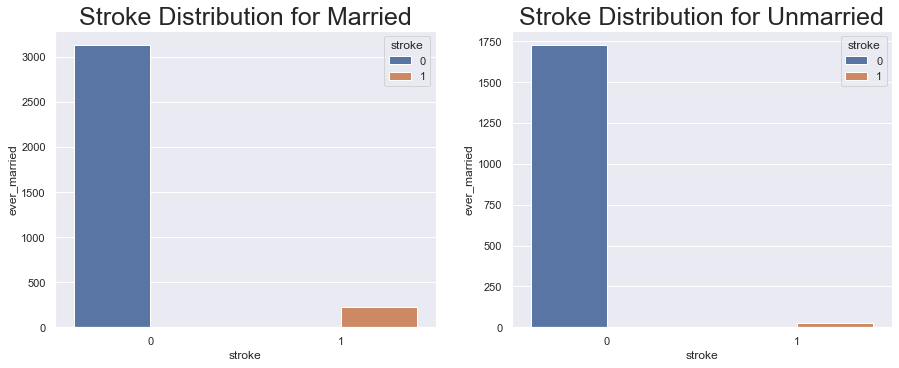

In [87]:
plt.figure(figsize = (15, 12))

plt.subplot(2, 2, 1)
sns.barplot(x = 'stroke', y = 'ever_married', hue = 'stroke', data = married).set_title('Stroke Distribution for Married').set_fontsize(25)

plt.subplot(2, 2, 2)
sns.barplot(x = 'stroke', y = 'ever_married', hue = 'stroke', data = unmarried).set_title('Stroke Distribution for Unmarried').set_fontsize(25)

plt.show()

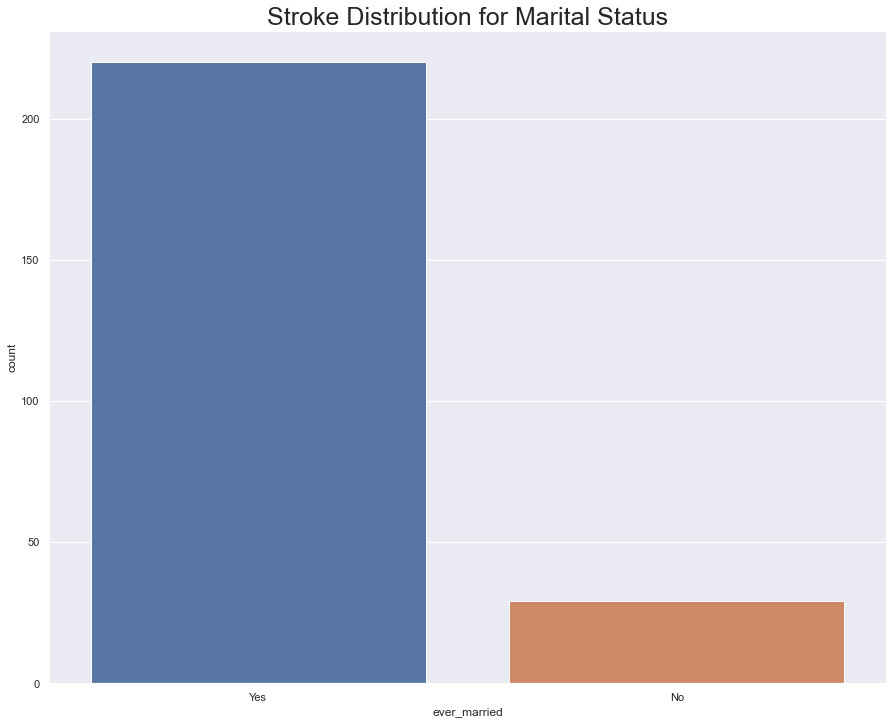

In [88]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
sns.countplot(data = stroke, x = 'ever_married').set_title('Stroke Distribution for Marital Status').set_fontsize(25)

plt.show()

We see that marital status may be a major factor in predicting strokes. People who are married tend to suffer more strokes compared to those who have not been married.

## Visualization for Urban and Rural locations

In [89]:
urban = data[data['Residence_type'] == 'Urban'].groupby(['stroke'])['Residence_type'].count().reset_index()

rural = data[data['Residence_type'] == 'Rural'].groupby(['stroke'])['Residence_type'].count().reset_index()

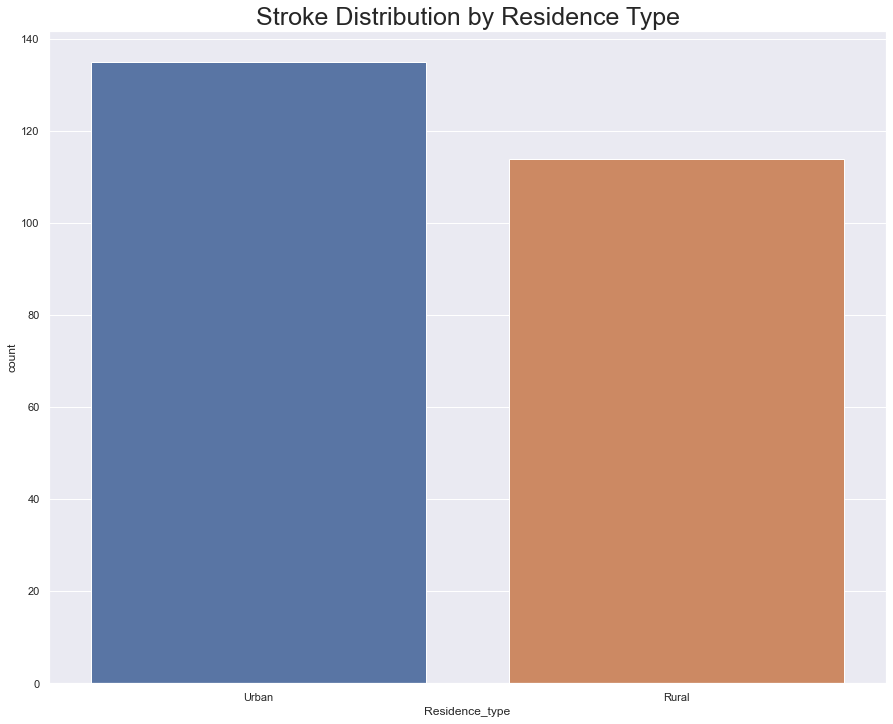

In [90]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
sns.countplot(data = stroke, x = 'Residence_type').set_title('Stroke Distribution by Residence Type').set_fontsize(25)

plt.show()

Residence Type does not appear to have a major role in determining whether someone suffers a stroke. The number of strokes among both residence types is about the same.

## Visualization for Work Type

In [91]:
private = data[data['work_type'] == 'Private'].groupby(['stroke'])['work_type'].count().reset_index()

self_employed = data[data['work_type'] == 'Self-employed'].groupby(['stroke'])['work_type'].count().reset_index()

govt_job = data[data['work_type'] == 'Govt_job'].groupby(['stroke'])['work_type'].count().reset_index()

children = data[data['work_type'] == 'children'].groupby(['stroke'])['work_type'].count().reset_index()

never_worked = data[data['work_type'] == 'Never_worked'].groupby(['stroke'])['work_type'].count().reset_index()

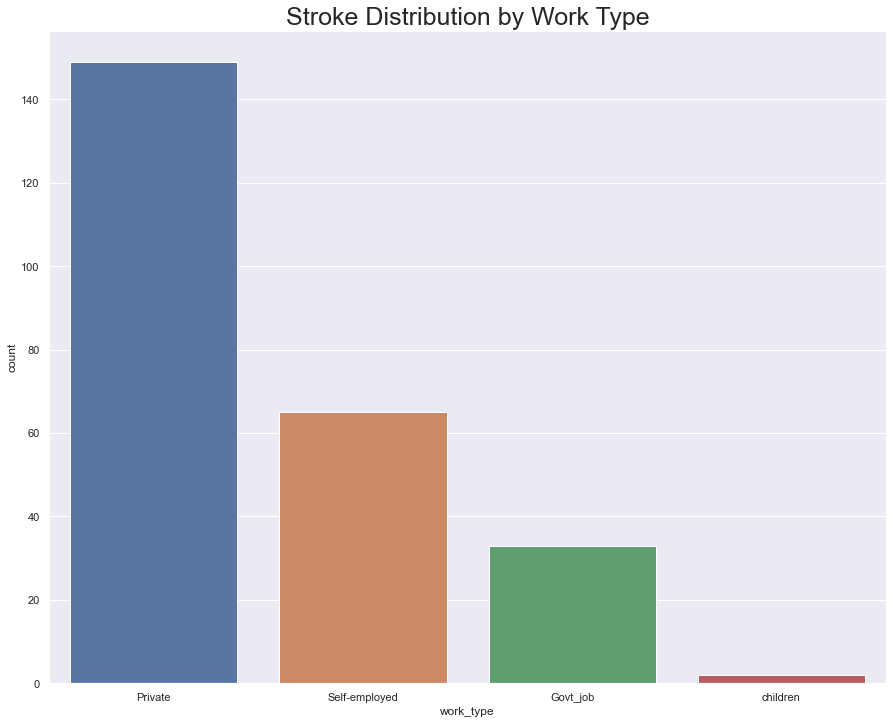

In [92]:
plt.figure(figsize = (15, 12))

stroke = data.loc[data['stroke'] == 1]
sns.countplot(data = stroke, x = 'work_type').set_title('Stroke Distribution by Work Type').set_fontsize(25)

plt.show()

When looking at distrbution of strokes among the private sector, self employed, and government jobs individually they look similar. When plotting the count of strokes among work type together, we see the self employed have the largest number of people who suffered strokes. This may be the added stress of not having an employer for security and support, but it's hard to know for sure. Children suffer strokes at a much lower rate than adults seem to. There were no instances of a stroke among those who have never worked.

## Visualization for Smoking Status

In [93]:
never_smoked = data[data['smoking_status'] == 'never smoked'].groupby(['stroke'])['smoking_status'].count().reset_index()

formerly_smoked = data[data['smoking_status'] == 'formerly smoked'].groupby(['stroke'])['smoking_status'].count().reset_index()

smokes = data[data['smoking_status'] == 'smokes'].groupby(['stroke'])['smoking_status'].count().reset_index()

unknown = data[data['smoking_status'] == 'Unknown'].groupby(['stroke'])['smoking_status'].count().reset_index()

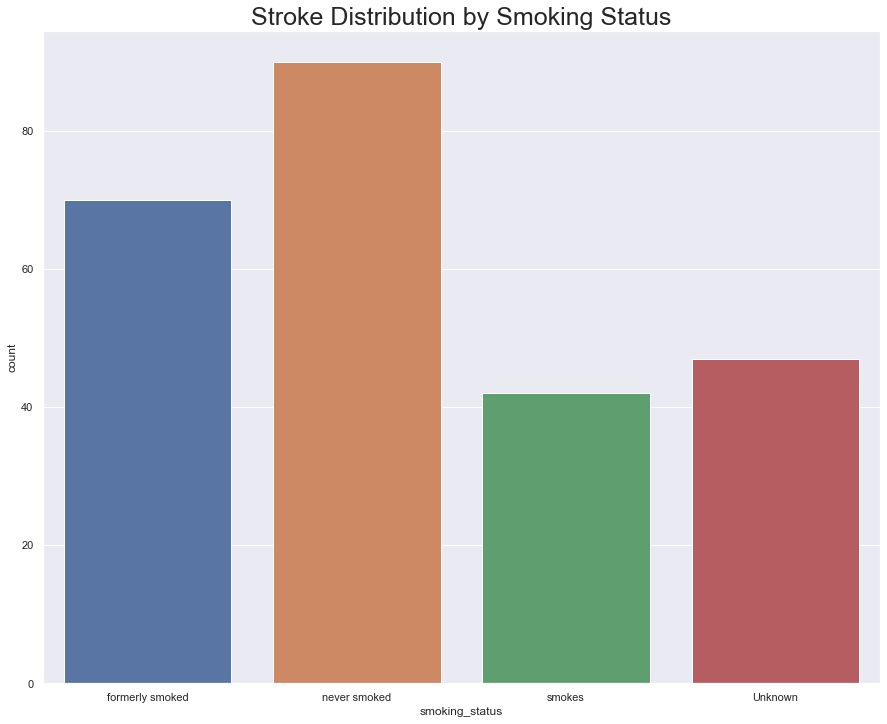

In [94]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
sns.countplot(data = stroke, x = 'smoking_status').set_title('Stroke Distribution by Smoking Status').set_fontsize(25)

plt.show()

The intuition we had regarding smoking in relation to stroke probability was incorrect. We expected to see a higher rates of strokes among people who smoked or formerly smoked when compared to people who never smoked. However, this does not appear to be the case. It looks as if smoking status does not play a major factor in the probability of a stroke occuring.

## Creating bins for BMI, Age, and Average Gluclose Level

In [95]:
# Binning numerical variables for analysis

data['BMI Category'] = pd.cut(data['bmi'], bins = [0,19,25,30,100], 
                    labels = ['Underweight','Normal','Overwweight','Obese'])

data['Age Category'] = pd.cut(data['age'], bins = [0,13,18,45,60,100], 
                    labels = ['Childern','Teens','Young Adults','Middle Aged Adults', 'Elderly'])

data['Glucose Level Category'] = pd.cut(data['avg_glucose_level'], bins = [0,90,160,230,300], 
                    labels = ['Low','Normal','High','Very High'])

The above code creates bins we will use when visualizing the data set. We created bins to describe the range of bmi from underweight to obese. For age, we created bins to separate children, teens, adults, middle aged adults, and the elderly. Similarly for avg_glucose_level, we created bins to show the range of levels from low to very high.

## Visualization for BMI

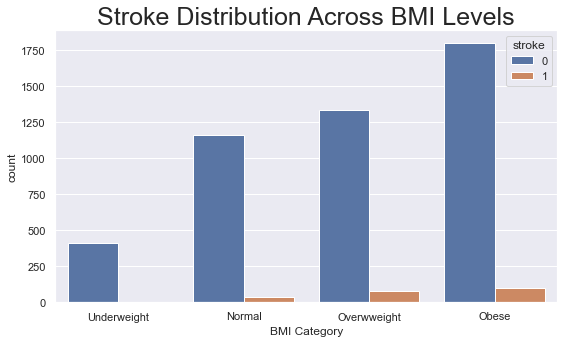

In [96]:
sns.set(rc = {'figure.figsize':(9,5)})

sns.countplot(x = 'BMI Category', hue = 'stroke', data = data).set_title('Stroke Distribution Across BMI Levels').set_fontsize(25)

Here we see that as the range of BMI increases, the chance of a stroke also tends to increase. People who are overweight and obese are at a much higher risk for stroke compared to those who are of normal weight.

## Visualization for Age

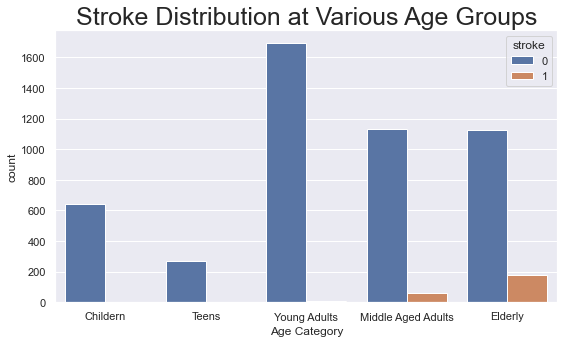

In [97]:
sns.set(rc = {'figure.figsize':(9,5)})

sns.countplot(x = 'Age Category', hue = 'stroke', data = data).set_title('Stroke Distribution at Various Age Groups').set_fontsize(25)

We see that older people are at a much higher risk for stroke compared to younger people. Middle aged and elderly people make up the majority of the people who suffered strokes in the dataset. We defined middle aged adults as people between 45 and 60. We defined elderly as people older than 60.

## Visualization for Glucose Levels

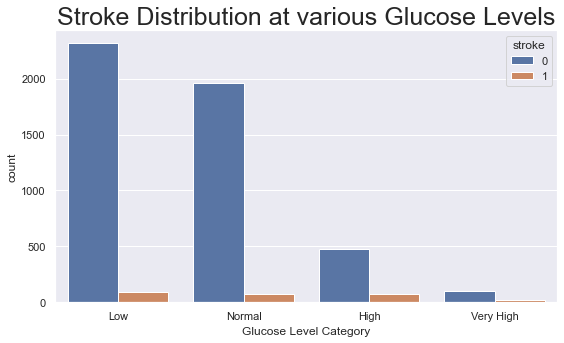

In [98]:
sns.set(rc = {'figure.figsize':(9,5)})

sns.countplot(x = 'Glucose Level Category', hue = 'stroke', data = data).set_title('Stroke Distribution at various Glucose Levels').set_fontsize(25)

This graph is deceiving. Looking at the orange bars it looks like the chances of strokes is even across the low, normal, and high range. However, the low range's cases of strokes is a smaller proportion of total cases compared to the high range.

## Visualization for Hypertension

In [99]:
hypertension = data[data['hypertension'] == 1].groupby(['stroke'])['hypertension'].count().reset_index()

no_hypertension = data[data['hypertension'] == 0].groupby(['stroke'])['hypertension'].count().reset_index()

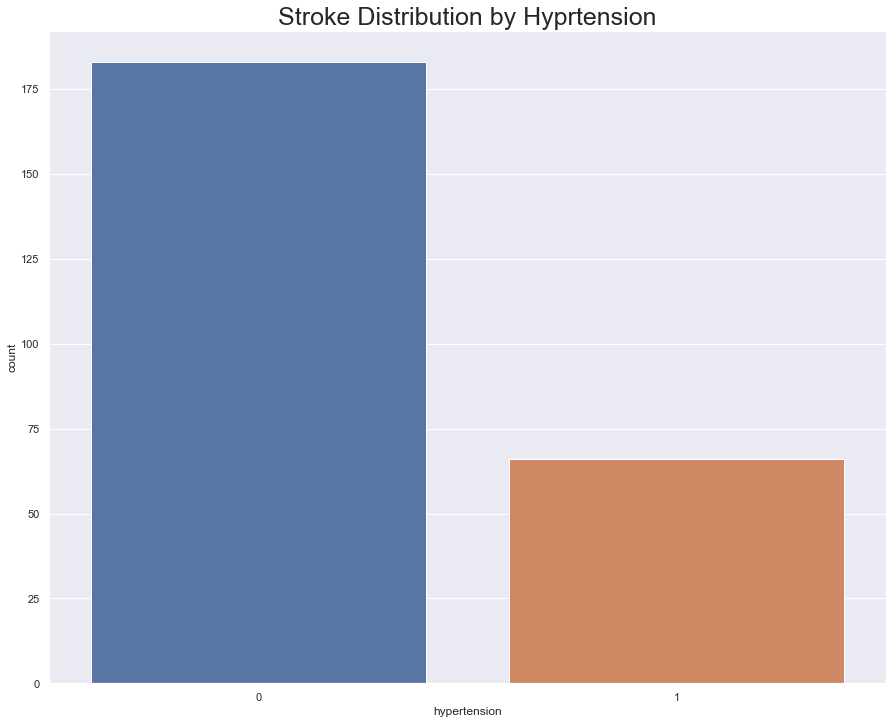

In [100]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
sns.countplot(data = stroke, x = 'hypertension').set_title('Stroke Distribution by Hyprtension').set_fontsize(25)

plt.show()

According to this graph. the majority of people who suffered strokes did not have hyptertension.

## Visualization for Heart Disease

In [101]:
heart_disease = data[data['heart_disease'] == 1].groupby(['stroke'])['heart_disease'].count().reset_index()

no_heart_disease = data[data['heart_disease'] == 0].groupby(['stroke'])['heart_disease'].count().reset_index()

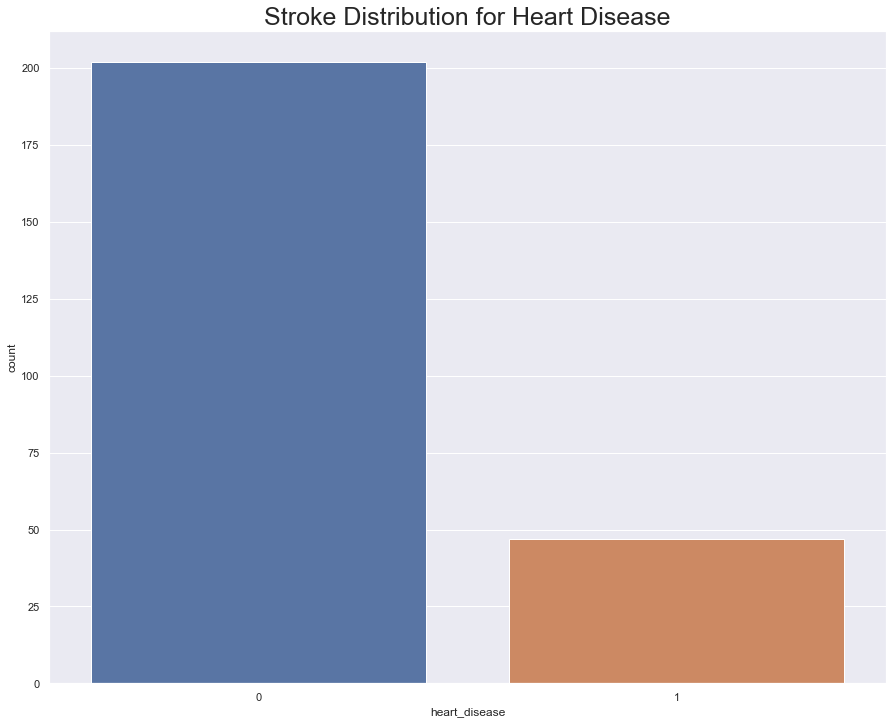

In [102]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
sns.countplot(data = stroke, x = 'heart_disease').set_title('Stroke Distribution for Heart Disease').set_fontsize(25)

plt.show()

Of the people who suffered strokes, most did not have some form of heat diease.

## Corrleation Heatmap

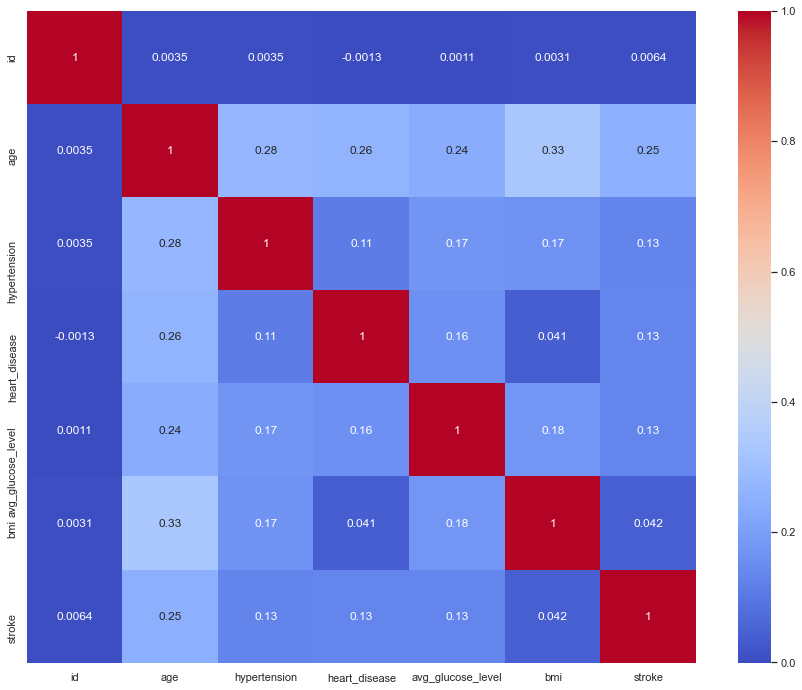

In [30]:
plt.figure(figsize = (15,12))

sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

plt.show()

This heatmap is created from the final data after processing. The processing code is located below. Looking at the correlation heatmap, we see that most of the variables aren't highly correlated with each other. We do see that age and ever_married have the highest correlation among variables. This is expected as people tend to get married when they're older. Age is the variable that contains the highest correlations among variables. We can go ahead and proceed without dropping any variables. Our analysis will not suffer from multicollinearity.

# Data Processing

## Filling in Missing Values

In [31]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
# Dropping the id column
data.drop(['id'], axis = 1, inplace = True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,BMI Category,Age Category,Glucose Level Category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese,Elderly,High
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,NaN,Elderly,High
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese,Elderly,Normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese,Middle Aged Adults,High
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal,Elderly,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,NaN,Elderly,Low
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Obese,Elderly,Normal
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Obese,Young Adults,Low
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Overwweight,Middle Aged Adults,High


In [32]:
data.isnull().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                         0
smoking_status              0
stroke                      0
BMI Category              201
Age Category                0
Glucose Level Category      0
dtype: int64

Here we see that we were sucessful in filling in all the na values in our dataset.

## Encoding Variables

### Label Encoding

In [33]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [34]:
residence = {'Urban': 0, 'Rural': 1}
data['Residence_type'] = data['Residence_type'].map(residence)

In [35]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
maritalStatus = {'No': 0, 'Yes': 1}
data['ever_married'] = data['ever_married'].map(maritalStatus)

In [37]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,BMI Category,Age Category,Glucose Level Category
0,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1,Obese,Elderly,High
1,Female,61.0,0,0,1,Self-employed,1,202.21,28.1,never smoked,1,NaN,Elderly,High
2,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1,Obese,Elderly,Normal
3,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1,Obese,Middle Aged Adults,High
4,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1,Normal,Elderly,High


We used simple label encoding to convert all the categorical variables with only 2 unique values into binary variables.

### One-Hot Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [39]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [40]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [41]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [42]:
ohe = OneHotEncoder()

## Creating Dummy Variables

In [43]:
data['gender'] = pd.Categorical(data['gender'])
gender_dummies = pd.get_dummies(data['gender'])
gender_dummies

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [44]:
data['smoking_status'] = pd.Categorical(data['smoking_status'])
smoking_status_dummies = pd.get_dummies(data['smoking_status'])
smoking_status_dummies

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [45]:
data['work_type'] = pd.Categorical(data['work_type'])
work_type_dummies = pd.get_dummies(data['work_type'])
work_type_dummies

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


## Removing Variables

In [46]:
data.drop('gender', axis = 1, inplace = True)
data.drop('work_type', axis = 1, inplace = True)
data.drop('smoking_status', axis = 1, inplace = True)

# Variables we created when making bins for visualization
data.drop('BMI Category', axis = 1, inplace = True)
data.drop('Age Category', axis = 1, inplace = True)
data.drop('Glucose Level Category', axis = 1, inplace = True)

We remove the gender, work type, and smoking status variables that we just created dummy variables for. We also remove the category bins variables we made for bmi, age, and average gluclose level.

## Adding New Dummy Variables

In [47]:
data = pd.concat([data, gender_dummies], axis = 1)
data = pd.concat([data, work_type_dummies], axis = 1)
data = pd.concat([data, smoking_status_dummies], axis = 1)
data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,1,202.21,28.1,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,0,83.75,28.1,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,0,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,1,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


We used the One-Hot-Encoder to encode all the variables with more than 2 unique levels. The reason we created multiple dummy variables is to avoid algorithms from interpreting the values of any single variable as having some hierarchy and thus giving them more value. 

## Scaling Variables

In [48]:
from sklearn.preprocessing import StandardScaler

### Create Scaled Variables

In [49]:
std = StandardScaler()

columns = ['avg_glucose_level', 'bmi', 'age']
scaled = std.fit_transform(data[['avg_glucose_level', 'bmi', 'age']])
scaled = pd.DataFrame(scaled, columns = columns)

### Replace Unscaled Variables with Scaled Versions

In [50]:
# Replacing unscaled columns with scaled columns

data = data.drop(columns = columns, axis = 1)
data = data.merge(scaled, left_index = True, right_index = True, how = 'left')

data

,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,avg_glucose_level,bmi,age
0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,2.706375,1.005086,1.051434
1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,2.121559,-0.098981,0.786070
2,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,-0.005028,0.472536,1.626390
3,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1.437358,0.719327,0.255342
4,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1.501184,-0.631531,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.494658,-0.098981,1.626390
5106,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.420775,1.446713,1.670617
5107,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.511443,0.225745,-0.363842
5108,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1.328257,-0.423706,0.343796


Here we scale the values of the bmi, average glucose level, and age columns and replace them in the data frame. 

## Over Sampling Using SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

X = data.drop(['stroke'], axis = 1)
Y = data['stroke']

X_smote, Y_smote = SMOTE().fit_resample(X, Y)

print("Before OverSampling, counts of label '1': {}".format(sum(Y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(Y_smote == 1)))
print("AFter OverSampling, counts of label '0': {} \n".format(sum(Y_smote == 0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, counts of label '1': 4861
AFter OverSampling, counts of label '0': 4861 



The feature we're focusing on are number of strokes in our dataset. Since our data is so highly imbalanced, we need to oversample the number of strokes using the SMOTE packge to get a more accuarate model.

## Splitting Dataset into Test and Train Sets

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size = 0.2, random_state = 20)

print('After OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('After OverSampling, the shape of Y_train: {} \n'.format(Y_train.shape))

print('After OverSampling, the shape of X_test: {}'.format(X_test.shape))
print('After OverSampling, the shape of Y_test: {} \n'.format(Y_test.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("AFter OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(Y_test == 1)))
print("AFter OverSampling, counts of label '0': {} \n".format(sum(Y_test == 0)))

After OverSampling, the shape of X_train: (7777, 19)
After OverSampling, the shape of Y_train: (7777,) 

After OverSampling, the shape of X_test: (1945, 19)
After OverSampling, the shape of Y_test: (1945,) 

After OverSampling, counts of label '1': 3885
AFter OverSampling, counts of label '0': 3892 

After OverSampling, counts of label '1': 976
AFter OverSampling, counts of label '0': 969 



# Modeling

## Libraries

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

## Logistic Regression

In [54]:
logReg = LogisticRegression()
log_model = logReg.fit(X_train, Y_train)

log_predict = logReg.predict(X_test)
log_confusion_matrix = confusion_matrix(Y_test, log_predict)
log_accuracy = accuracy_score(Y_test, log_predict)

print('Confusion Matirx')
print(log_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Logistic Regression:', round(log_accuracy*100, 2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, log_predict))

Confusion Matirx
[[817 152]
 [150 826]]
------------------------------------------------------
Accracy of Logistic Regression: 84.47 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       969
           1       0.84      0.85      0.85       976

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945



## Linear Regression

In [55]:
linReg = LinearDiscriminantAnalysis()
lin_model = linReg.fit(X_train, Y_train)

lin_predict = linReg.predict(X_test)
lin_confusion_matrix = confusion_matrix(Y_test, lin_predict)
lin_accuracy = accuracy_score(Y_test, lin_predict)

print('Confusion Matirx')
print(lin_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Linear Regression:', round(lin_accuracy*100, 2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, lin_predict))

Confusion Matirx
[[810 159]
 [146 830]]
------------------------------------------------------
Accracy of Linear Regression: 84.32 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       969
           1       0.84      0.85      0.84       976

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945



## Naive-Bayes

In [56]:
nb = GaussianNB()
nb_model = nb.fit(X_train, Y_train)

nb_predict = nb.predict(X_test)
nb_confusion_matrix = confusion_matrix(Y_test, nb_predict)
nb_accuracy = accuracy_score(Y_test, nb_predict)

print('Confusion Matirx')
print(nb_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Naive-Bayes:', round(nb_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, nb_predict))

Confusion Matirx
[[162 807]
 [  2 974]]
------------------------------------------------------
Accracy of Naive-Bayes: 58.41 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.17      0.29       969
           1       0.55      1.00      0.71       976

    accuracy                           0.58      1945
   macro avg       0.77      0.58      0.50      1945
weighted avg       0.77      0.58      0.50      1945



## Decision Tree

In [57]:
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, Y_train)

DT_predict = DT.predict(X_test)
DT_confusion_matrix = confusion_matrix(Y_test, DT_predict)
DT_accuracy = accuracy_score(Y_test, DT_predict)

print('Confusion Matirx')
print(DT_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Decision Trees:', round(DT_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, DT_predict))

Confusion Matirx
[[845 124]
 [ 96 880]]
------------------------------------------------------
Accracy of Decision Trees: 88.69 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       969
           1       0.88      0.90      0.89       976

    accuracy                           0.89      1945
   macro avg       0.89      0.89      0.89      1945
weighted avg       0.89      0.89      0.89      1945



## Support Vector Classifer

In [58]:
SVC = SVC()
SVC_model = SVC.fit(X_train, Y_train)

SVC_predict = SVC.predict(X_test)
SVC_confusion_matrix = confusion_matrix(Y_test, SVC_predict)
SVC_accuracy = accuracy_score(Y_test, SVC_predict)

print('Confusion Matirx')
print(SVC_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Support Vector Classifier:', round(SVC_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, SVC_predict))

Confusion Matirx
[[829 140]
 [ 65 911]]
------------------------------------------------------
Accracy of Support Vector Classifier: 89.46 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       969
           1       0.87      0.93      0.90       976

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945



## Random Forest

In [59]:
RF = RandomForestClassifier()
RF_model = RF.fit(X_train, Y_train)

RF_predict = RF.predict(X_test)
RF_confusion_matrix = confusion_matrix(Y_test, RF_predict)
RF_accuracy = accuracy_score(Y_test, RF_predict)

print('Confusion Matirx')
print(RF_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Random Forest Classifier:', round(RF_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, RF_predict))

Confusion Matirx
[[903  66]
 [ 20 956]]
------------------------------------------------------
Accracy of Random Forest Classifier: 95.58 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       969
           1       0.94      0.98      0.96       976

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



## K-Nearest Neighbors

In [60]:
KNN = KNeighborsClassifier()
KNN_model = KNN.fit(X_train, Y_train)

KNN_predict = KNN.predict(X_test)
KNN_confusion_matrix = confusion_matrix(Y_test, KNN_predict)
KNN_accuracy = accuracy_score(Y_test, KNN_predict)

print('Confusion Matirx')
print(KNN_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of K-Nearest Neighbors Classifier:', round(KNN_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, KNN_predict))

Confusion Matirx
[[801 168]
 [ 17 959]]
------------------------------------------------------
Accracy of K-Nearest Neighbors Classifier: 90.49 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       969
           1       0.85      0.98      0.91       976

    accuracy                           0.90      1945
   macro avg       0.92      0.90      0.90      1945
weighted avg       0.91      0.90      0.90      1945



## Gradient Boosting

In [61]:
GB = GradientBoostingClassifier()
GB_model = GB.fit(X_train, Y_train)

GB_predict = GB.predict(X_test)
GB_confusion_matrix = confusion_matrix(Y_test, GB_predict)
GB_accuracy = accuracy_score(Y_test, GB_predict)

print('Confusion Matirx')
print(GB_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Gradient Boosting Classifier:', round(GB_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, GB_predict))

Confusion Matirx
[[802 167]
 [ 90 886]]
------------------------------------------------------
Accracy of Gradient Boosting Classifier: 86.79 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       969
           1       0.84      0.91      0.87       976

    accuracy                           0.87      1945
   macro avg       0.87      0.87      0.87      1945
weighted avg       0.87      0.87      0.87      1945



# Model Evaluation

In [62]:
models = ['Logistic','Linear','NB','DT','SVC','RF','KNN','GB']

accuracy = [round(log_accuracy*100, 2),round(lin_accuracy*100, 2),round(nb_accuracy*100, 2),round(DT_accuracy*100, 2),
            round(SVC_accuracy*100, 2),round(RF_accuracy*100, 2),round(KNN_accuracy*100, 2),round(GB_accuracy*100, 2)]

model_evaluation = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
model_evaluation

,Model,Accuracy
0,Logistic,84.47
1,Linear,84.32
2,NB,58.41
3,DT,88.69
4,SVC,89.46
5,RF,95.58
6,KNN,90.49
7,GB,86.79


## Plotting Accuracy of Models

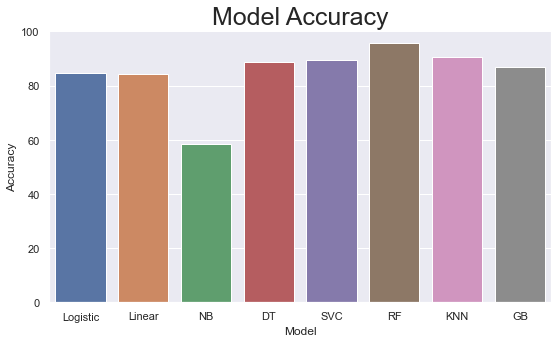

In [63]:
sns.barplot(x = 'Model', y = 'Accuracy', data = model_evaluation).set_title('Model Accuracy').set_fontsize(25)

After running various models, we found that the Random Forest models gives us the highest accuracy score among all models tested. It also had the highest F-score and Recall among all models for both instances of stroke and no stroke. Recall is the ratio of correctly predicted positive obersations. In other words, of all the patients who suffered a stroke, how many did we correctly identify. Similarly, of all patients who did not suffer a stroke, how many did we label correctly.

## Feature Importance

In [64]:
importance = RF.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01582
Feature: 1, Score: 0.01245
Feature: 2, Score: 0.03000
Feature: 3, Score: 0.02926
Feature: 4, Score: 0.01632
Feature: 5, Score: 0.01692
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01997
Feature: 8, Score: 0.00031
Feature: 9, Score: 0.02024
Feature: 10, Score: 0.01871
Feature: 11, Score: 0.01792
Feature: 12, Score: 0.01861
Feature: 13, Score: 0.01640
Feature: 14, Score: 0.02223
Feature: 15, Score: 0.01353
Feature: 16, Score: 0.17686
Feature: 17, Score: 0.15701
Feature: 18, Score: 0.39743


### Plotting Feature Importance

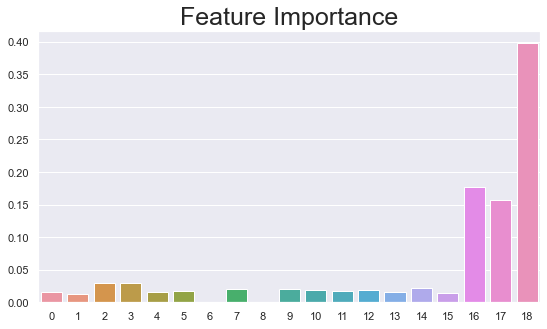

In [65]:
sns.barplot([x for x in range(len(importance))], importance).set_title('Feature Importance').set_fontsize(25)
plt.show()

Looking at our graph for feature importance we see that the overwhelming highest values come from features 16, 17, and 18. These corresponding to average glucose level, bmi, and age respectfully.

# Conclusion

In conclusion, we were able to build a random forest model with about 95% accuracy in predictions for strokes. We found that age is by far the most important feature in predicting strokes in this dataset. Bmi and average glucose level also were important in predicting strokes accurately. Given that the dataset was a split of 5% for stroke and 95% for no stroke. The random forest model is the only model with higher accuracy than a baseline model that would only predict no stroke and would achieve a 95% accuracy score by default.